# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/uOttawa-Collabs/CSI4142-Winter-2024-Project/master/shopping_trends.csv")

# Data Cleaning

## Normalize Data Types

In [4]:
# Convert the Gender to type string
df["Gender"] = df["Gender"].astype("string")

In [5]:
# Convert the Item Purchased to type string
df["Item Purchased"] = df["Item Purchased"].astype("string")

In [6]:
# Convert the Category to type string
df["Category"] = df["Category"].astype("string")

In [7]:
# Convert the Location to type string
df["Location"] = df["Location"].astype("string")

In [8]:
# Convert the Size to type string
df["Size"] = df["Size"].astype("string")

In [9]:
# Convert the Color to type string
df["Color"] = df["Color"].astype("string")

In [10]:
# Convert the Seasion to type string
df["Season"] = df["Season"].astype("string")

In [11]:
# Change the Subscription Status to bool type
df["Subscription Status"] = df["Subscription Status"] == "Yes"

In [12]:
# Convert the Shipping Type to type string
df["Shipping Type"] = df["Shipping Type"].astype("string")

In [13]:
# Change the Discount Applied to bool type
df["Discount Applied"] = df["Discount Applied"] == "Yes"

In [14]:
# Change the Promo Code Used to bool type
df["Promo Code Used"] = df["Promo Code Used"] == "Yes"

In [15]:
# Convert the Frequency Purchases to type string
df["Frequency of Purchases"] = df["Frequency of Purchases"].astype("string")

In [16]:
df.dtypes

Customer ID                          int64
Age                                  int64
Gender                      string[python]
Item Purchased              string[python]
Category                    string[python]
Purchase Amount (USD)                int64
Location                    string[python]
Size                        string[python]
Color                       string[python]
Season                      string[python]
Review Rating                      float64
Subscription Status                   bool
Payment Method                      object
Shipping Type               string[python]
Discount Applied                      bool
Promo Code Used                       bool
Previous Purchases                   int64
Preferred Payment Method            object
Frequency of Purchases      string[python]
dtype: object

## Drop Unrequired Columns

In [17]:
# Drop the Payment Method column
df = df.drop(columns = ["Payment Method"])

# Drop the Preferred Payment Method column
df = df.drop(columns=["Preferred Payment Method"])

In [18]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,True,Express,True,True,14,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,True,Express,True,True,2,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,True,Free Shipping,True,True,23,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,True,Next Day Air,True,True,49,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,True,Free Shipping,True,True,31,Annually


## Normalize Fixed Point Numbers

In [19]:
df["Purchase Amount (USD)"] = df["Purchase Amount (USD)"] * 100
df["Previous Purchases"] = df["Previous Purchases"] * 100
df["Review Rating"] = (df["Review Rating"] * 10).astype(int)

In [20]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,5300,Kentucky,L,Gray,Winter,31,True,Express,True,True,1400,Fortnightly
1,2,19,Male,Sweater,Clothing,6400,Maine,L,Maroon,Winter,31,True,Express,True,True,200,Fortnightly
2,3,50,Male,Jeans,Clothing,7300,Massachusetts,S,Maroon,Spring,31,True,Free Shipping,True,True,2300,Weekly
3,4,21,Male,Sandals,Footwear,9000,Rhode Island,M,Maroon,Spring,35,True,Next Day Air,True,True,4900,Weekly
4,5,45,Male,Blouse,Clothing,4900,Oregon,M,Turquoise,Spring,27,True,Free Shipping,True,True,3100,Annually


## Generate Age Group

In [21]:
age_groups = []

for age in df["Age"]:
  if age < 18 or age > 70:
    raise ValueError("Age exceeded valid range")

  age_group = (age - 1) // 5 - 2
  age_groups.append(age_group)

df["Age Group"] = age_groups

In [22]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Age Group
0,1,55,Male,Blouse,Clothing,5300,Kentucky,L,Gray,Winter,31,True,Express,True,True,1400,Fortnightly,8
1,2,19,Male,Sweater,Clothing,6400,Maine,L,Maroon,Winter,31,True,Express,True,True,200,Fortnightly,1
2,3,50,Male,Jeans,Clothing,7300,Massachusetts,S,Maroon,Spring,31,True,Free Shipping,True,True,2300,Weekly,7
3,4,21,Male,Sandals,Footwear,9000,Rhode Island,M,Maroon,Spring,35,True,Next Day Air,True,True,4900,Weekly,2
4,5,45,Male,Blouse,Clothing,4900,Oregon,M,Turquoise,Spring,27,True,Free Shipping,True,True,3100,Annually,6


In [23]:
df.dtypes

Customer ID                        int64
Age                                int64
Gender                    string[python]
Item Purchased            string[python]
Category                  string[python]
Purchase Amount (USD)              int64
Location                  string[python]
Size                      string[python]
Color                     string[python]
Season                    string[python]
Review Rating                      int64
Subscription Status                 bool
Shipping Type             string[python]
Discount Applied                    bool
Promo Code Used                     bool
Previous Purchases                 int64
Frequency of Purchases    string[python]
Age Group                          int64
dtype: object

# Part A1: Data Summarization

In [24]:
# Check if there are null values
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Frequency of Purchases    0
Age Group                 0
dtype: int64

In [25]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Age Group
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,5976.435897,37.499487,2535.153846,6.204615
std,1125.977353,15.207589,2368.539225,7.162228,1444.712517,3.045635
min,1.000000,18.000000,2000.000000,25.000000,100.000000,1.000000
25%,975.750000,31.000000,3900.000000,31.000000,1300.000000,4.000000
50%,1950.500000,44.000000,6000.000000,37.000000,2500.000000,6.000000
75%,2925.250000,57.000000,8100.000000,44.000000,3800.000000,9.000000
max,3900.000000,70.000000,10000.000000,50.000000,5000.000000,11.000000


## Summarizing the dataset using scatter plots, boxplots, and histograms

Focusing on `Purchase Amount` as it is directly related to the motivation of analyzing sales and discounts

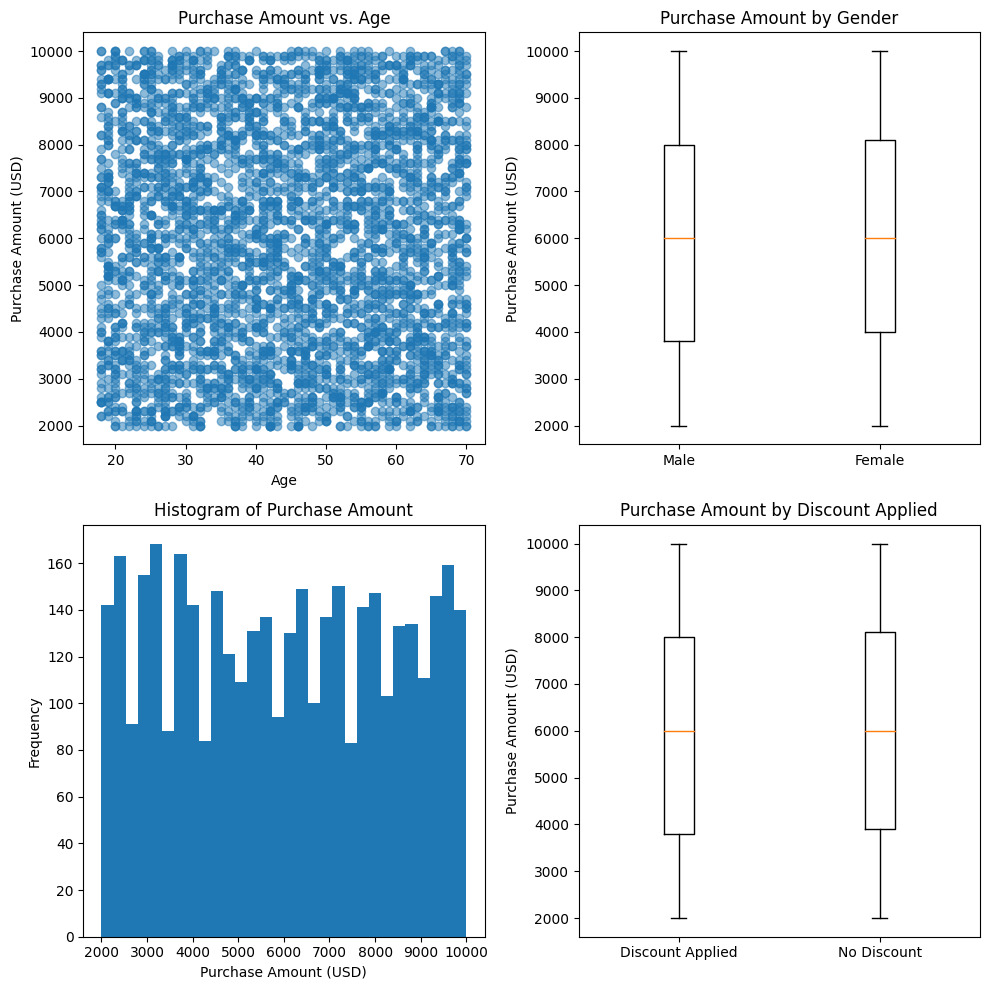

In [26]:
plt.figure(figsize=(10, 10))

# Scatter plot of Purchase Amount vs. Age
plt.subplot(2, 2, 1)
plt.scatter(df["Age"], df["Purchase Amount (USD)"], alpha=0.5)
plt.title("Purchase Amount vs. Age")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")

# Boxplot of Purchase Amount by Gender
plt.subplot(2, 2, 2)
plt.boxplot([df.loc[df["Gender"] == "Male", "Purchase Amount (USD)"],
             df.loc[df["Gender"] == "Female", "Purchase Amount (USD)"]],
            labels=["Male", "Female"])
plt.title("Purchase Amount by Gender")
plt.ylabel("Purchase Amount (USD)")

# Histogram of Purchase Amount
plt.subplot(2, 2, 3)
plt.hist(df["Purchase Amount (USD)"], bins=30)
plt.title("Histogram of Purchase Amount")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")

# Boxplot of Purchase Amount by Discount Applied
plt.subplot(2, 2, 4)
plt.boxplot([df.loc[df["Discount Applied"] == True, "Purchase Amount (USD)"],
             df.loc[df["Discount Applied"] == False, "Purchase Amount (USD)"]],
            labels=["Discount Applied", "No Discount"])
plt.title("Purchase Amount by Discount Applied")
plt.ylabel("Purchase Amount (USD)")

plt.tight_layout()
plt.show()

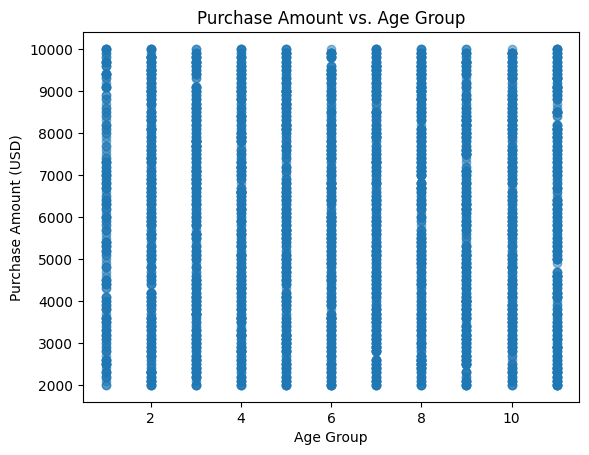

In [27]:
# Scatter plot of Purchase Amount vs. Age Group
plt.figure()
plt.scatter(df["Age Group"], df["Purchase Amount (USD)"], alpha=0.5)
plt.title("Purchase Amount vs. Age Group")
plt.xlabel("Age Group")
plt.ylabel("Purchase Amount (USD)")
plt.show()

## Summary of Data Preprocessing

### Understanding the Dataset
Before diving into preprocessing, it's essential to understand the structure and contents of the dataset. Here's a brief overview of the columns present in the dataset:

* Customer ID: Unique identifier for each customer.
* Age: Age of the customer.
* Gender: Gender of the customer (Male/Female).
* Item Purchased: The item purchased by the customer.
* Category: Category of the item purchased.
* Purchase Amount (USD): The amount of the purchase in USD.
* Location: Location where the purchase was made.
* Size: Size of the purchased item.
* Color: Color of the purchased item.
* Season: Season during which the purchase was made.
* Review Rating: Rating given by the customer for the purchased item.
* Subscription Status: Indicates if the customer has a subscription (Yes/No).
* Shipping Type: Type of shipping chosen by the customer.
* Discount Applied: Indicates if a discount was applied to the purchase (Yes/No).
* Promo Code Used: Indicates if a promo code was used for the purchase (Yes/No).
* Frequency of Purchases: Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly).

### Preprocessing Steps
#### Data Type Conversion
We converted certain columns to their appropriate data types using pandas' astype function. This ensures consistency. Columns such as Gender, Item Purchased, Category, Location, Size, Color, Season, and Frequency of Purchases were converted to string type.

#### Boolean Conversion
Columns representing binary attributes such as Subscription Status, Discount Applied, and Promo Code Used were converted to boolean type. This conversion simplifies analysis involving these attributes.

#### Normalization of Numerical Values
We normalized certain numerical columns to bring them to a common scale. In this case, the 'Purchase Amount (USD)' column was multiplied by 100 to represent amounts in cents. Similarly, other numerical columns like 'Previous Purchases' and 'Review Rating' were normalized accordingly.

#### Feature Engineering
A new feature 'Age Group' was generated based on the age of the customers. This feature categorizes customers into age groups, which can potentially provide insights into age-related trends in purchasing behavior. Age groups were created in increments of five years, excluding customers below 18 and above 70.

#### Column Removal
Columns such as 'Payment Method' and 'Preferred Payment Method' were dropped from the dataset. These columns might not provide significant insights or could be redundant for the analysis.

## Data Quality Issues
The analysis of the dataset reveals several data quality issues that need attention:
* The unnaturally uniform distribution observed in the scatter plots, particularly the one depicting Purchase Amount versus Age, raises concerns about the authenticity of the data. Such a uniform distribution may indicate potential data generation or collection anomalies, possibly stemming from synthetic or simulated data.
* The absence of missing values and outliers, as indicated by the lack of noise in the box plots, further supports the suspicion of artificially generated data. While the absence of missing values and outliers is typically desirable, their complete absence, coupled with the uniformity observed, suggests a potential lack of variability and realism within the dataset. These data quality issues call into question the representativeness and authenticity of the dataset, necessitating further investigation and potentially validation from the data source to ensure its reliability for subsequent analysis and decision-making processes.

# Part A2: One-Hot Encoding

In [28]:
from sklearn.preprocessing import OneHotEncoder
from pprint import pprint

categorical_cols = ["Gender", "Item Purchased", "Category", "Location", "Size",
                    "Color", "Season", "Subscription Status", "Shipping Type",
                    "Discount Applied", "Promo Code Used", "Frequency of Purchases"]
df_categorical = df[categorical_cols]

encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(df_categorical)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)
df

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Age Group,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,...,Discount Applied_True,Promo Code Used_False,Promo Code Used_True,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,55,5300,31,1400,8,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,19,6400,31,200,1,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,50,7300,31,2300,7,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,21,9000,35,4900,2,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,45,4900,27,3100,6,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,2800,42,3200,5,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3896,3897,52,4900,45,4100,8,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3897,3898,46,3300,29,2400,7,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3898,3899,44,7700,38,2400,6,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Part A3: Normalization

Since the Age Group will be used as the label in Classification part, we will not normalize the Age Group column.

In [29]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = [
    "Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"
]
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Age Group,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,...,Discount Applied_True,Promo Code Used_False,Promo Code Used_True,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,0.711538,0.4125,0.24,0.265306,8,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,0.019231,0.5500,0.24,0.020408,1,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,0.615385,0.6625,0.24,0.448980,7,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0.057692,0.8750,0.40,0.979592,2,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0.519231,0.3625,0.08,0.612245,6,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,0.423077,0.1000,0.68,0.632653,5,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3896,3897,0.653846,0.3625,0.80,0.816327,8,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3897,3898,0.538462,0.1625,0.16,0.469388,7,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3898,3899,0.500000,0.7125,0.52,0.469388,6,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Part B: Classification

In part B, we decided to use the age group attributes as the label of data. We will investage the performances of 3 different model in predecting the age group based on the other attributes.

In [30]:
# Separate the dataframe as label and data
df_label = df["Age Group"]

# Remove the continuous attributes
df_data = df[df.columns.difference(["Customer ID", "Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases", "Age Group"])]

# Change the float types numbers to int
import numpy as np
for column in df_data.columns:
    df_data.loc[:, column] = df_data[column].astype("int")

In [31]:
# Calculate evaluation function
from sklearn.metrics import confusion_matrix
from numpy import mean
from numpy import isnan
def get_result(matrix):
  FP = matrix.sum(axis=0) - np.diag(matrix)
  FN = matrix.sum(axis=1) - np.diag(matrix)
  TP = np.diag(matrix)
  TN = matrix.sum() - (FP + FN + TP)
  (FP, FN, TP, TN)
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  accuracy = (TP + TN) / (TP + TN + FP + FN)
  return (get_average(precision), get_average(recall), get_average(accuracy))

def get_average(arr):
  result = []
  for i in arr:
    if not np.isnan(i):
      result.append(i)
  return mean(result)

In [32]:
# Change the float types numbers to int
import numpy as np
for column in df_data.columns:
    # Separate the training data and the testing data
    df_data.loc[:, column] = df_data[column].astype("int")
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_data, df_label, test_size = 0.3)

In [33]:
# Training Decision Tree classifier
# Import Classifiers
from sklearn.tree import DecisionTreeClassifier

import time
t1 = time.time()
dtc = DecisionTreeClassifier(random_state=0)
dtc = dtc.fit(x_train, y_train)
t2 = time.time()
run_time_1 = (t2 - t1)

In [34]:
# Training Gradient Boosting classifier
# Import Classifiers
from sklearn.ensemble import GradientBoostingClassifier

t1 = time.time()
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc = gbc.fit(x_train, y_train)
t2 = time.time()

run_time_2 = (t2 - t1)

In [35]:
# Training Random Forest classifier
# Import Classifiers
from sklearn.ensemble import RandomForestClassifier
t1 = time.time()
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc = rfc.fit(x_train, y_train)
t2 = time.time()

run_time_3 = (t2 - t1)

In [36]:
# Testing models
dtc_result = dtc.predict(x_test)
gbc_result = gbc.predict(x_test)
rfc_result = rfc.predict(x_test)

# Evaluation
dtc_matrix = confusion_matrix(dtc_result, y_test)
gbc_matrix = confusion_matrix(gbc_result, y_test)
rfc_matrix = confusion_matrix(rfc_result, y_test)
dtc_outputs = get_result(dtc_matrix)
gbc_outputs = get_result(gbc_matrix)
rfc_outputs = get_result(rfc_matrix)
print(dtc_outputs)
print(gbc_outputs)
print(rfc_outputs)

(0.10264132666221809, 0.10337889744760137, 0.837140637140637)
(0.10662111506208749, 0.10937074795000065, 0.8376068376068375)
(0.10595409135792182, 0.0679061317543162, 0.8358974358974358)


<ipython-input-31-41ae8000ecc6>:12: RuntimeWarning: invalid value encountered in divide
  recall = TP / (TP + FN)


## Display the result as charts

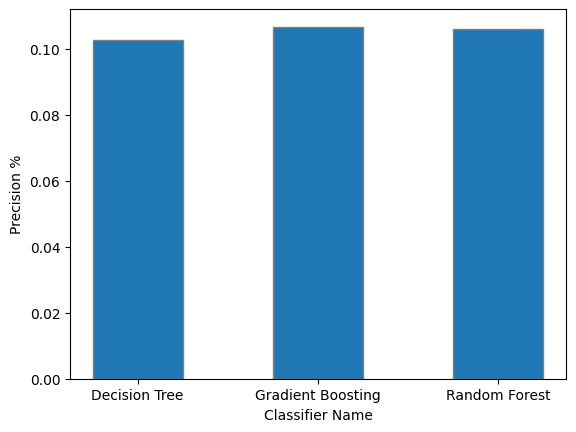

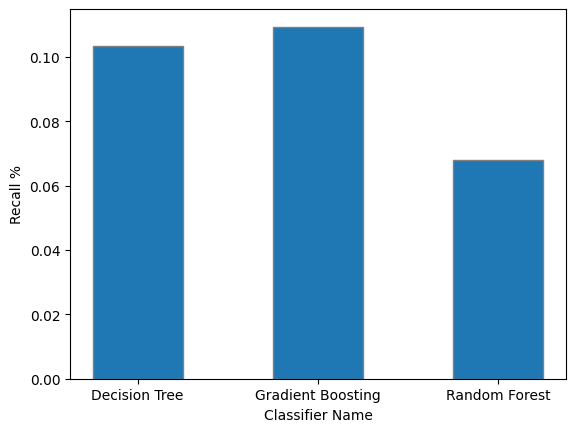

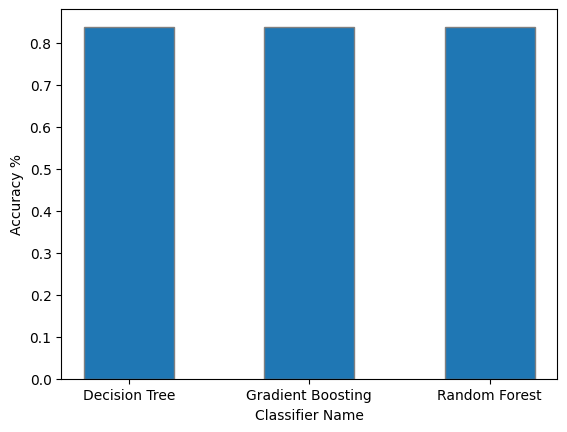

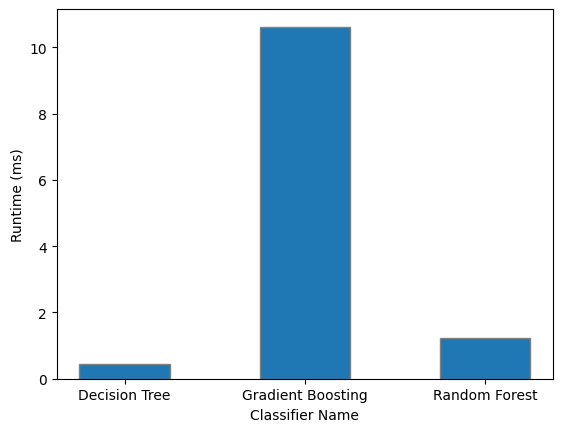

In [37]:
name_list = ["Decision Tree", "Gradient Boosting", "Random Forest"]
precision__results = [dtc_outputs[0], gbc_outputs[0], rfc_outputs[0]]
recall_results = [dtc_outputs[1], gbc_outputs[1], rfc_outputs[1]]
accuracy_results = [dtc_outputs[2], gbc_outputs[2], rfc_outputs[2]]
run_time = [run_time_1, run_time_2, run_time_3]

plt.bar(name_list, precision__results, width=0.5,color='C0',edgecolor='grey')
plt.xlabel('Classifier Name')
plt.ylabel('Precision %')
plt.show()

plt.bar(name_list, recall_results, width=0.5,color='C0',edgecolor='grey')
plt.xlabel('Classifier Name')
plt.ylabel('Recall %')
plt.show()

plt.bar(name_list, accuracy_results, width=0.5,color='C0',edgecolor='grey')
plt.xlabel('Classifier Name')
plt.ylabel('Accuracy %')
plt.show()

plt.bar(name_list, run_time, width=0.5,color='C0',edgecolor='grey')
plt.xlabel('Classifier Name')
plt.ylabel('Runtime (ms)')
plt.show()

## Summary of Classification

Based on the data distribution chart in Part A, we find that the data are evenly scattered, which indicates that the current data frame does not show any obvious user preferences with distinct features. By using three different classifiers, we have arrived at the same conclusion. According to the results shown in the figures above, we found that the recall and precision values of the three classifiers are between 0.8 and 1.2, which is essentially the same as the average number of Age Groups. This also proves that the dataset does not show a clear preference for customers in any particular Age Group.

However, through model training, we found that the training time for the Gradient Boosting classifier is much longer than the time spent training the other two models. At the same time, the classification results of the Gradient Boosting classifier are better than the test results of the other two models. This indicates that the Gradient Boosting classifier is more suitable for the dataframe we are using.

During training the model, we also tried removing some attributes from the dataframe to test whether this would affect the test results. From the results, reducing the columns in the dataframe shortened the time required to train the model, but still did not have a significant impact on the test results. Changing some parameters of the model also affects the training time, but again, there was no significant change in the test results. This makes us even more convinced that the issue lies with the dataset itself, rather than our approach to using the models.